__The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images.__

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
img = cv2.imread('/Users/dhruvkumar/Desktop/thor.jpg')

In [27]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

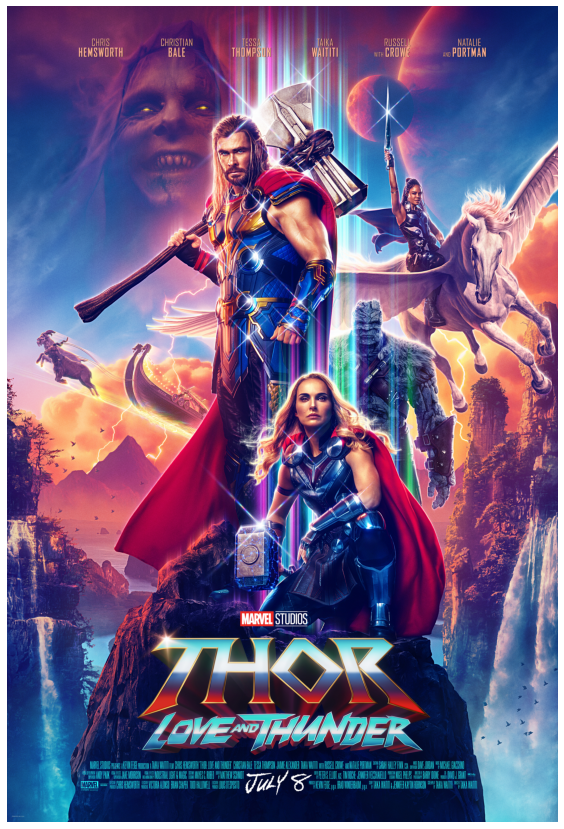

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
print(img.shape)

pixels = img.reshape(-1,3)

print(pixels.shape)

(2500, 1688, 3)
(4220000, 3)


In [30]:
# Extracting K most dominant colors
from sklearn.cluster import KMeans

In [31]:
dominant_colors = 30
km = KMeans(n_clusters=dominant_colors)

In [32]:
km.fit(pixels)

KMeans(n_clusters=30)

In [33]:
print(km.cluster_centers_)

[[ 82.5106827   31.82700398  85.30767596]
 [218.69304903 165.16525766 180.08117241]
 [ 81.90352521 127.46779935 182.6357486 ]
 [107.64940922  73.08815861 129.89852247]
 [225.08259674 105.27493857 106.96336695]
 [  4.13991853  10.83023207  54.57847357]
 [ 31.04592036  75.40420092 142.3145764 ]
 [164.2194081  153.05761152 190.88935271]
 [129.38668656  11.95254234  65.70324882]
 [243.67407218 208.37371573 198.14006363]
 [189.54516433 206.55537749 227.3762846 ]
 [ 10.77762771  21.38113187  80.32431803]
 [107.99166579  48.95101312  99.98906278]
 [ 52.35291998 197.34305229 210.30020079]
 [144.83628763  68.32594864 108.44701346]
 [ 21.02429172  46.62551977 116.66667564]
 [249.74156652 197.88018157 141.16829971]
 [244.49649486 155.28690143 114.30575525]
 [113.04241009 159.77150612 202.79384137]
 [242.63911549 241.61971049 238.97430312]
 [ 70.25724738  54.3096357  117.27420003]
 [ 28.79773604 130.3191455  181.91225146]
 [143.31529328 106.96514472 152.68250202]
 [ 44.92924989  20.96503757  51.15

In [34]:
centers = np.array(km.cluster_centers_,dtype='uint8')
print(centers)

[[ 82  31  85]
 [218 165 180]
 [ 81 127 182]
 [107  73 129]
 [225 105 106]
 [  4  10  54]
 [ 31  75 142]
 [164 153 190]
 [129  11  65]
 [243 208 198]
 [189 206 227]
 [ 10  21  80]
 [107  48  99]
 [ 52 197 210]
 [144  68 108]
 [ 21  46 116]
 [249 197 141]
 [244 155 114]
 [113 159 202]
 [242 241 238]
 [ 70  54 117]
 [ 28 130 181]
 [143 106 152]
 [ 44  20  51]
 [191  13  66]
 [184  84 112]
 [ 46  31  95]
 [133 197 222]
 [196 126 154]
 [ 63  96 157]]


In [35]:
plt.figure(figsize=(10,7))
i=1
for color in centers:
    plt.subplot(1,dominant_colors,i)
    i+=1
    plt.axis('off')
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=color
    plt.imshow(a)
    
plt.show()

In [36]:
# Segmenting the image
pixels.shape

(4220000, 3)

In [37]:
km.labels_

array([26, 26, 26, ...,  2,  2,  2], dtype=int32)

In [38]:
km.labels_.shape

(4220000,)

In [39]:
newimg = np.zeros(pixels.shape,dtype='uint8')
for i in range(pixels.shape[0]):
    newimg[i]=centers[km.labels_[i]]

In [40]:
newimg = newimg.reshape(img.shape)

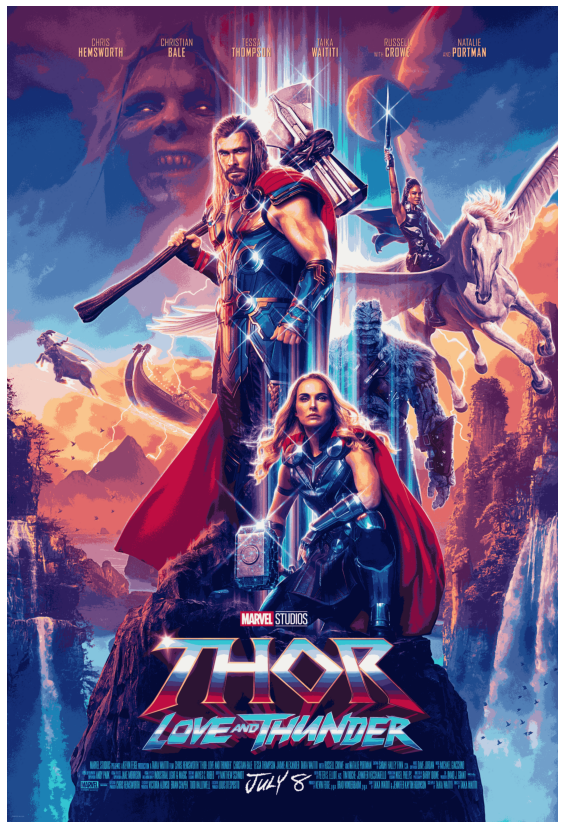

In [41]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(newimg)